# Predictive Modeling for Heart Disease Diagnosis

Group members: Prashant Dhungana, Nisha Pillai, Mariya Mathews, Arteen Rafiei

# Introduction

## Purpose and Domain:


The domain of this research is healthcare analytics, with a focus on leveraging predictive modelling to enhance the diagnosis of heart disease. By investigating a Heart Disease dataset, this project aims to identify and analyze the best model and most significant predictors of heart disease, contributing to the development of more accurate diagnostic tools. The practical implications of our analysis and findings are to potentially improve early detection rates, inform preventive measures, and guide treatment strategies for heart disease, thereby reducing the overall burden of this prevalent condition.

By examining risk factor analysis, predictive modeling, time-related dynamics, and interaction effects, this study seeks not only to advance the understanding of heart disease predictors but also to contribute to the improvement of diagnostic and preventive measures. The findings could significantly impact public health strategies, healthcare policies, and individual patient care, highlighting the importance of predictive analytics in the ongoing battle against heart disease.



## Population of Interest:

The population of interest encompasses individuals within the Cleveland database, emphasizing the processed file that has been subject to prior preprocessing measures such as the anonymization of patient data. It is derived from diverse backgrounds, compiled by institutions and medical professionals. Variables of interest include age, sex, resting blood pressure, serum cholesterol levels, fasting blood sugar, and maximum heart rate achieved, among others. These variables, both categorical and numerical, offer a comprehensive overview of patient health conditions and risk factors associated with heart disease.


## Analytical Approach:
Through the analysis, this project will explore various statistical and machine learning methods,  K-Nearest Neighbour, Support Vector Machine, Decision Trees and more to develop a predictive model for heart disease. The evaluation of these models will focus on metrics such as accuracy, sensitivity, confusion matrices and ROC curves, aiming to identify the most effective approach for predicting heart disease presence.




# Dataset

The dataset used for this analysis is the Heart Disease dataset is available on Kaggle (https://www.kaggle.com/datasets/data855/heart-disease/data). The dataset contains 303 instances and 13 features. It consists of data related to patients' health conditions and includes information such as age, sex, resting blood pressure, serum cholesterol levels, fasting blood sugar, maximum heart rate achieved, and more. The target attribute in the dataset indicates the absence and presence of heart disease, with values 0 and 1 resp.

The dataset contributors include  institutions and medical professionals such as the Hungarian Institute of Cardiology, University Hospitals in Zurich and Basel, and the V.A. Medical Center in Long Beach and Cleveland Clinic Foundation, who collaborated to compile the dataset.

Additionally, David W. Aha generously donated the dataset, facilitating widespread access for research purposes.The exact time period of data collection is not specified.The Heart Disease dataset is licensed under CC0, making it part of the public domain.



Here's a brief overview of the columns:

  * age: Age of the patient
  * sex: Sex of the patient  (1 = male, 0 = female)
  * cp: Chest pain type
  * trestbps: Resting blood pressure (in mm Hg on admission to the hospital)
  * chol: Serum cholesterol in mg/dl
  * fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
  * restecg: Resting electrocardiographic results (values 0,1,2)
  * thalach: Maximum heart rate achieved
  * exang: Exercise-induced angina (1 = yes; 0 = no)
  * oldpeak: ST depression induced by exercise relative to rest
  * slope: The slope of the peak exercise ST segment
  * ca: Number of major vessels (0-3) colored by fluoroscopy
  * thal: Thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect)
  * target: Heart disease (1 = no, 0 = yes)


In [ ]:
#Libraries Used

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC #Support vector machine
from sklearn.naive_bayes import GaussianNB #Gaussian naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [ ]:
#import dataset
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Pre-Processing

The initial step of the assesment was to check for any missing values. There were no observation of any missing values or any inconsistencies that need to be addressed in the dataset. However, it is imporatnt to note that the data was split into 80% training and 20% testing for model building.

In [ ]:
#Check for any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Exploratory Data Analysis (EDA)



This part of the analysis focuses on the summary statistics and visualizing the key health indication in prevelance to heart diseases.

### Summary Statistics

In [ ]:
summary_statistics=df.describe(include='all')
summary_statistics

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Here are some of the key Statistical Highlights:

* **Count:** All variables have a count of 303 variables, indicating the number of observations in the dataset with no missing values.

* **Mean and Standard Deviation (Std):** The statistics reveal an average age of approximately 54 years with moderate age variance, a higher proportion of males indicated by a mean close to 0.68, varied cholesterol levels with a mean of 246 mg/dl and standard deviation of 51.83 mg/dl, and an average maximum heart rate of 150 bpm with a standard deviation of 22.91 bpm.

* **Minimum and Maximum (Min/Max):** There is a wide range of physilogical measurements such as resting blood pressure varies from 94 to 200 mm Hg, cholesterol levels range from 126 to 564 mg/dl, and a maximum heart span from 71 to 202 bpm, indicating diverse values across these parameters.

* **Quartiles (25%, 50%, 75%):** The quartiles analysis reveals that for age, the middle aged to older adult population has a median age of 55 years, with 25% of individuals below 47.5 years and 25% above 61 years. In terms of cholesterol levels, half of the dataset falls between 211 and 274.5 mg/dl, with a median cholesterol level of 240 mg/dl. Regarding maximum heart heart, there's a significant increase in heart rate capacity among individuals in the upper quartile, with a median of 153 bpm, a 25th percentile of 133.5bpm, and a 75th percentile of 166 bpm.

### Exploration of Heart Disease Prevalance by Key Health Indicators

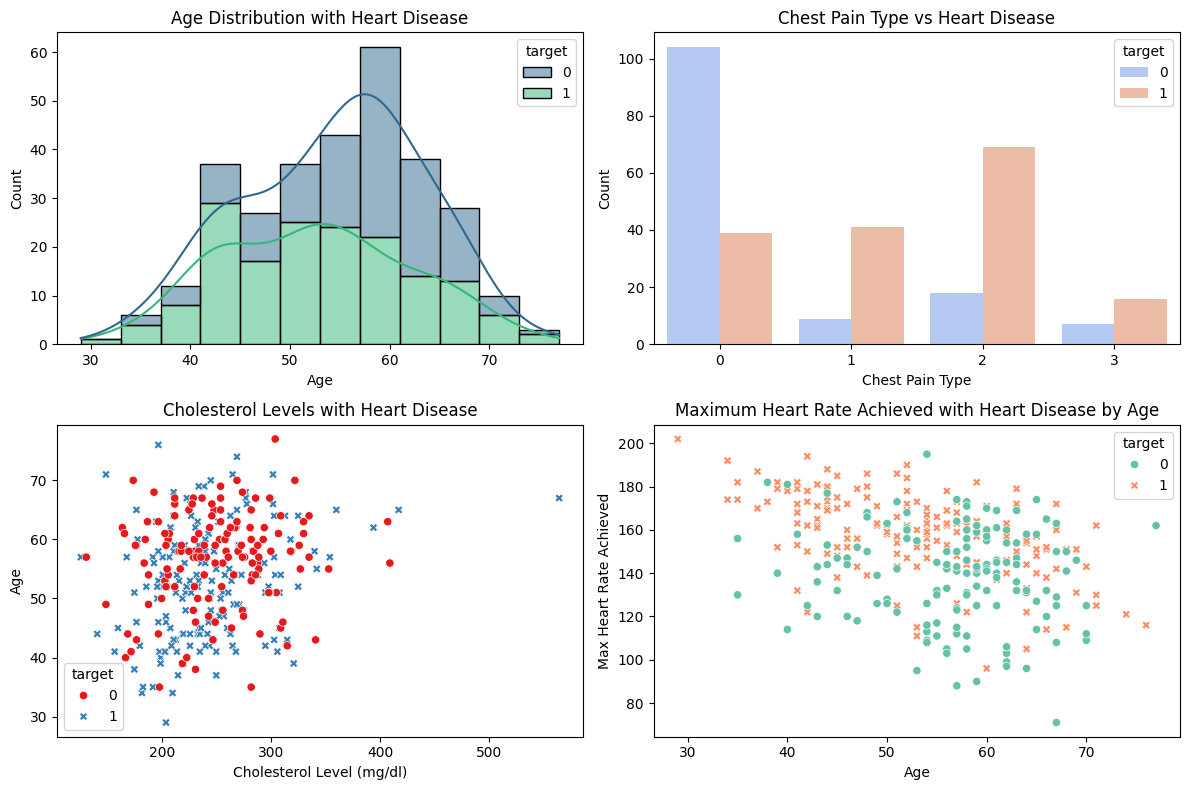

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for multiple plots
plt.figure(figsize=(12, 8))

# Age Distribution with Heart Disease
plt.subplot(2, 2, 1)
sns.histplot(df, x='age', hue='target', multiple='stack', kde=True, palette='viridis')
plt.title('Age Distribution with Heart Disease')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(False)

# Chest Pain Type vs Heart Disease
plt.subplot(2, 2, 2)
sns.countplot(x='cp', hue='target', data=df, palette='coolwarm')
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.grid(False)

# Cholesterol Levels with Heart Disease
plt.subplot(2, 2, 3)
sns.scatterplot(x='chol', y='age', hue='target', data=df, style='target', palette='Set1')
plt.title('Cholesterol Levels with Heart Disease')
plt.xlabel('Cholesterol Level (mg/dl)')
plt.ylabel('Age')
plt.grid(False)

# Maximum Heart Rate Achieved with Heart Disease by Age
plt.subplot(2, 2, 4)
sns.scatterplot(x='age', y='thalach', hue='target', data=df, style='target', palette='Set2')
plt.title('Maximum Heart Rate Achieved with Heart Disease by Age')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate Achieved')
plt.grid(False)

plt.tight_layout()
plt.show()

Based on the exploration of heart diseases by the prevelance of health indicators the following observations can be made:

  * **Age Distribution with Heart Disease:** The distribution shows a wide range of ages affected by heart disease, with a notable peak around the age of 55-60 years. Both younger and older populations are represented, indicating that heart disease affects a broad age group.

  * **Chest pain Type vs Heart Disease:** There's a significant relationship between the type of chest pain (cp) and the presence of heart disease. Type 2 chest pain seems to be more commonly associated with heart disease, suggesting that the nature of chest pain could be an important indicator of heart disease.

  * **Cholesterol Levels with Heart Disease:** The relationship between cholesterol levels and age, examined with heart disease presence as a variable, does not exhibit a distinct trend. This suggests that while cholesterol plays a role in heart disease, its influence may be nuanced and affected by additional factors.

  * **Maximum Heart Rate Achieved with Heart Disease by Age:** The scatterplot indicates a trend where younger individuals with heart disease tend to achieve higher maximum heart rates during exercise compared to their counterparts without heart disease. As age increases, maximum heart rates decrease for both groups, although individuals with heart disease consistently achieve higher maximum heart rates across most age groups.



### Correlation Analysis


To further enhance the EDA and prepare for predictive model, it is important to conducat a correlation analysis. This will help in uunderstanding how different variables are related to each other and more importantly, how they relate to the presence of heart disease ('target')

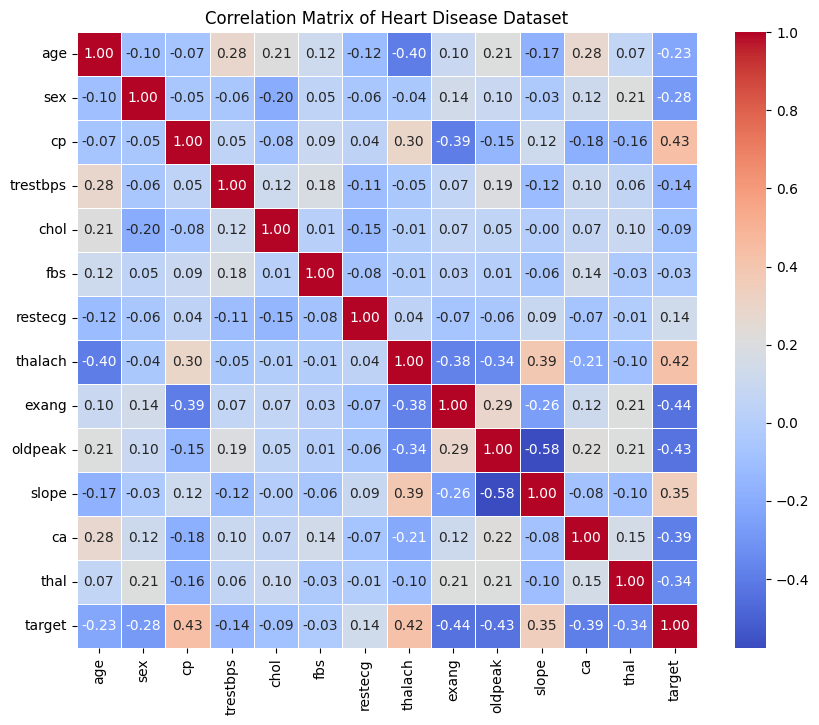

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Heart Disease Dataset')
plt.show()

Here are some key insights made form the observation of the correlation matrix above:

  * **Positive Correlation with Target:** Varibales such as 'cp' (chest pain type) and 'thalach' (maximum heart rate achieved) has a significant positive correlation with the presenece of heart disease ('target') suggesting that as the value of these variables increases it is strongly associated with the presence of heart disease.

  * **Negative Correlation with Target:** Variables like 'exang' (exercise-induced angina), 'oldpeak' (ST depression induced by exercise relative to rest), 'ca' (number of major vessels colored by fluoroscopy), and 'thal' show negative correlations with the target. This indicates that higher values of these variables are associated with a lower likelihood of heart disease presence.

  * **Correlations Among Predictors:** The matrix also highlights correlations among predictor variables, not just with the target. For example, 'age' shows a positive correlation with 'trestbps' (resting blood pressure) and 'chol' (serum cholesterol), which is consistent with general medical understanding that these factors can increase with age.

# Analysis





In [ ]:
# Define X and y
X = df.drop(columns=['target'])
y = df['target']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

# Logistic Regression



Logistic Regression is a statistical method used for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (where there are only two possible outcomes). In the context of our project on heart disease diagnosis, logistic regression can be applied to predict the presence or absence of heart disease in patients based on the various predictor variables.

The core idea of logistic regression is to find a relationship between the independent variables and the log odds of the dependent variable being 1 (the presence of heart disease). This is achieved through a logistic function, which ensures that the predictions lie between 0 and 1, making them interpretable as probabilities.

After splitting and training the dataset, we applied StandardScaler to normalize our features. Instantiated a LogisticRegression model and trained it using the scaled training data. After training, we used the model to make predictions on the scaled test set and finally calculated the accuracy of the model as a measure of how often the model is correct across the test set.

In [ ]:
#Logistic Regression
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeling
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Accuracy: 0.8524590163934426
Mean Squared Error: 0.14754098360655737


Now we will incorporate hyperparameter tuning to find the set of optimal hyperparameters for the learning algorithm, which can significantly improve our model's performance.

In [ ]:
# Hyperparameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Grid search with cross-validation
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, verbose=True, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

# Predictions with the best model
y_pred_best = best_model.predict(X_test_scaled)

# Evaluation
accuracy_log = accuracy_score(y_test, y_pred_best)
print(f'Accuracy with Best Hyperparameters: {accuracy_log}')

# Calculate Mean Squared Error for the best model
mse_best = mean_squared_error(y_test, y_pred_best)
print(f'Mean Squared Error with Best Hyperparameters: {mse_best}')


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Hyperparameters: {'C': 1.623776739188721, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy with Best Hyperparameters: 0.8524590163934426
Mean Squared Error with Best Hyperparameters: 0.14754098360655737


It appears the logistic regression model Accuracy and MSE remain the same before and after hyperparameter tuning which can be attributed to Sci-kit Learn's built in hyperparameter tuning being quite advanced. The accuracy is also quite high which indicates the model has good predictive power.  

In [ ]:

# Use the best model for predictions on both the training and testing set
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Generate classification report
report = classification_report(y_test, y_test_pred)
print("Classification Report")
print(report)

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



Overall, the model shows a strong performance across both classes with no significant bias toward either class. The balanced F1-scores are indicative of a model that is equally adept at precision and recall, which can be important when the costs of false positives and false negatives are similar. However, in the context of heart disease where the consequences of false negatives can be severe, you might wish to have a higher recall for class 1, even if it comes at the expense of reduced precision.

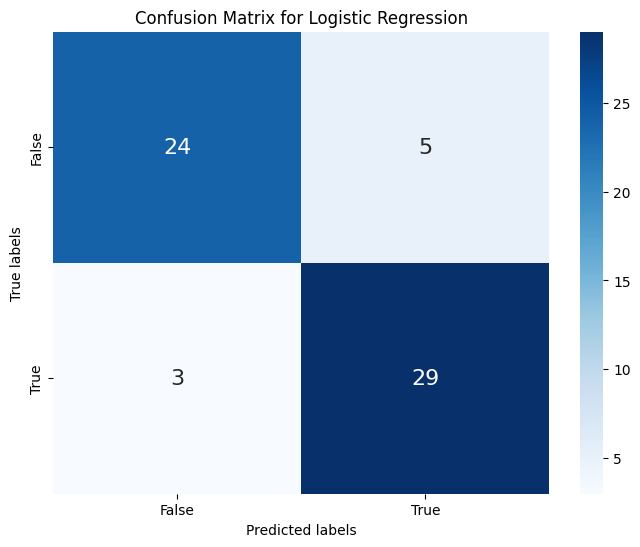

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Define labels
labels = ['False', 'True']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"fontsize": 16}, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


The number of false negatives and false positives are fairly low, which indicates good performance. Overall, the confusion matrix suggests that the model is quite accurate, with a balanced performance on both classes.

## Summary:

Feature Scaling: The features  are scaled using StandardScaler to ensure that they're on the same scale, which is important for models like logistic regression that are sensitive to the scale of input features.

Modeling: A logistic regression model is created and trained on the scaled training data.
Predictions: The model makes predictions on the scaled test data.

Evaluation: The model's accuracy and mean squared error are calculated using the true labels (y_test) and the predicted labels (y_pred). Initially, the accuracy is reported as approximately 85.25%, and the MSE is 0.1475.

Hyperparameter Tuning: To improve the model, hyperparameter tuning is conducted using a grid search over a defined parameter grid, with cross-validation to find the optimal settings. The best hyperparameters are found to be a regularization strength (C) of approximately 1.6238, using the l2 penalty and the liblinear solver.

Best Model Evaluation: The logistic regression model with the best hyperparameters is re-evaluated. The accuracy and MSE remain the same as before tuning, suggesting that the initial model was already performing optimally with the given data.

Detailed Performance Analysis: A classification report is generated for the best model, showing precision, recall, and F1-score for each class. The report indicates a balanced performance across the binary classes, with an overall accuracy of about 85.25%. The explanation also suggests considering the balance between precision and recall, especially in contexts like heart disease prediction where the cost of false negatives may be high.

Confusion Matrix Visualization: Finally, a confusion matrix for the logistic regression model is plotted, providing a visual representation of the model's performance in terms of true positives, true negatives, false positives, and false negatives. The matrix further confirms the model's good performance and balanced accuracy across both classes.

# K-Nearest Neighbors



K-Nearest Neighbors (KNN) is a simple, instance-based learning algorithm used for classification and regression. In classification, KNN assigns a class to the new data point based on the majority class of its 'k' nearest neighbors. It is non-parametric meaning it does not make any underlying assumptions about the distribution of data (non-parametric) and does not use the training data points to do any generalization. This means that the algorithm retains the entire training dataset during the training phase and uses it during the prediction phase, which can result in a computationally expensive process as the dataset grows.

In the context of our heart disease dataset, KNN can be used to predict whether a patient has heart disease or not by finding the most similar cases (i.e., nearest neighbors) in the dataset based on the features.

Since finetuning is difficult we will apply hyperparameter tuning right away.

In [ ]:
# KNN Classifier with hyperparameter tuning
param_grid_knn = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, verbose=True, n_jobs=-1)
grid_search_knn.fit(X_train_scaled, y_train)

# Display the best parameters
print(f"Best Parameters for KNN: {grid_search_knn.best_params_}")

best_knn = grid_search_knn.best_estimator_
y_pred_best_knn = best_knn.predict(X_test_scaled)
y_proba_best_knn = best_knn.predict_proba(X_test_scaled)
logloss = log_loss(y_test, y_proba_best_knn)
accuracy_knn = accuracy_score(y_test, y_pred_best_knn)
mse = mean_squared_error(y_test, y_pred_best_knn)
print(f"Accuracy: {accuracy_knn}")
print(f"Mean Squared Error: {mse}")
#print(f"Log Loss: {logloss}")

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'uniform'}
Accuracy: 0.8852459016393442
Mean Squared Error: 0.11475409836065574


This is a high accuracy rate, suggesting that the K Nearest Neighbors (KNN) classifier is performing quite well on the test set. It means that approximately 88.52% of the classifier's predictions are correct.

In [ ]:
# Use the best model to make predictions on the test set
best_knn = grid_search_knn.best_estimator_
y_pred_best_knn = best_knn.predict(X_test_scaled)

# Classification report
print("Classification Report")
print(classification_report(y_test, y_pred_best_knn))

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Class 0 (no heart disease) has a precision of 0.89 and recall of 0.86, while class 1 (presence of heart disease) has a precision of 0.88 and recall of 0.91. These are balanced and high values, indicating the model is performing well for both classes. The support shows the number of actual occurrences of each class in the dataset, which seems quite balanced in this case. The overall accuracy of the model is 0.89, indicating that the model correctly predicts the outcome 89% of the time.

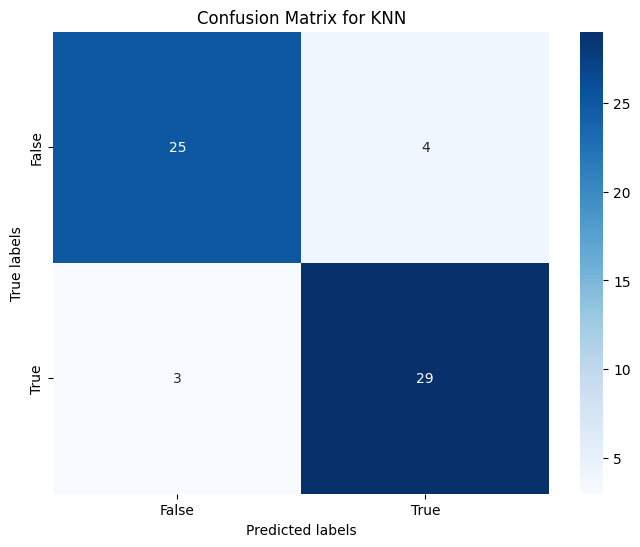

In [ ]:
# Confusion matrix for the best KNN
cm_best_knn = confusion_matrix(y_test, y_pred_best_knn)

# Define labels for the confusion matrix
labels = ['False', 'True']

# Plot confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_knn, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for KNN')
plt.show()


The confusion matrix shows 25 true negatives and 29 true positives, which indicates that the model correctly predicted the absence of heart disease 25 times and its presence 29 times. The model has a higher true positive rate compared to the false negative rate, which is particularly important in medical diagnoses where missing out on a positive case (false negative) could have serious implications.

## Summary:

Hyperparameter Tuning: Given the complexity of fine-tuning KNN, hyperparameter tuning is applied immediately using GridSearchCV to explore combinations of the number of neighbors (n_neighbors), weight functions (weights), and distance metrics (metric). The best parameters found are 20 neighbors, 'uniform' weight, and 'manhattan' distance metric.

Evaluation of the Best Model: The best KNN model, determined through grid search, achieves an accuracy of approximately 88.52% and a mean squared error (MSE) of 0.1148 on the test set, indicating high performance.

Classification Report: A detailed classification report shows precision, recall, and F1-scores for two classes (indicative of heart disease presence or absence). Both classes have high and balanced metrics, with overall model accuracy around 89%. This suggests the model performs well in predicting both the presence and absence of heart disease, with balanced precision and recall.

Confusion Matrix Visualization: The confusion matrix is presented, showing a significant number of true positives (29) and true negatives (25), indicating the model's effectiveness in correctly predicting heart disease status. The matrix highlights the model's capability in minimizing false negatives, crucial in medical diagnostic contexts where missing a positive case can have serious consequences.

# Support Vector Machine




Support Vector Machine (SVM) is a powerful supervised machine learning algorithm used for classification and regression tasks. It works by finding the optimal hyperplane that maximally separates data points of different classes in a high-dimensional space. Now lets explore this robust classification algorithm in heart disease analysis, aiming to accurately distinguish between individuals with and without heart disease.

We utilized a pipeline combining StandardScaler preprocessing and Support Vector Machine (SVM) classification to optimize heart disease prediction. Grid search, a hyperparameter tuning technique, was employed to fine-tune the SVM model. The best parameters obtained were a linear or radial basis function kernel with a regularization parameter (C) of 0.1 and either 'scale' or 'auto' for the kernel coefficient (gamma). This approach ensured improved model performance by systematically exploring the hyperparameter space and selecting the optimal configuration for accurate heart disease diagnosis.

In [ ]:
# Define the parameter grid
param_grid = {
    'svm__kernel': ['linear', 'rbf'],  # List of kernels
    'svm__C': [0.1],  # Regularization parameter
    'svm__gamma': ['scale', 'auto']  # Kernel coefficient
}

# Initialize StandardScaler and SVC objects
scaler = StandardScaler()
svm_model = SVC(random_state=42)

# Create a pipeline
pipeline = Pipeline([
    ('scaler', scaler),  # StandardScaler as the first step
    ('svm', svm_model)   # SVC as the second step
])

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}


After evaluating, GridCV has identified the optimal hyperparameters.
The optimal hyperparameters for the SVM model are determined as follows:

* regularization parameter C of 0.1,

* gamma set to 'scale' for automatic adjustment based on data characteristics,

* 'linear' kernel for defining a linear decision boundary.

### Accuracy

The best parameters from grid search were used to initialize and train an SVM model. Predictions were made on the testing set, and the accuracy of the model was evaluated.

In [ ]:
#Initialize SVM model with the best parameters
# Extract relevant parameters from best_params
best_svm_params = {
    'kernel': best_params['svm__kernel'],
    'C': best_params['svm__C'],
    'gamma': best_params['svm__gamma']
}
best_svm_model = SVC(**best_svm_params)

# Train the model with the best parameters
best_svm_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = best_svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_svm)

Accuracy: 0.8852459016393442


The SVM model achieved an accuracy of approximately 88.52% on the testing set, indicating its effectiveness in predicting heart disease.

### Classification Report

In [ ]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61




The observed results indicates the following:

* Test Set Accuracy: The accuracy achieved on the test set is approximately 89%. This indicates that the model correctly predicts the target variable for about 89% of the samples in the test set.

* The classification report provides insights into the model performance across different classes.

  * Class 0: The precision for class 0 (No Heart Disease) is 0.89 indicating that 89% of the predicitons are true negatives, while the recall is 0.86, signifying that 86% of true (No Heart Disease) samples are correctly identified.

  * Class 1: For class 1 (Heart Disease) the precision is 0.88, indicating 88% of the predictions are ture positives, while the recall is 0.91 suggesting that 91% of true Heart Disease samples are correctly identified.

  * The F1-score in both classes is approximately 0.88 reflecting a balance of precision and recall for the overall model performance.

### Confusion Matrix

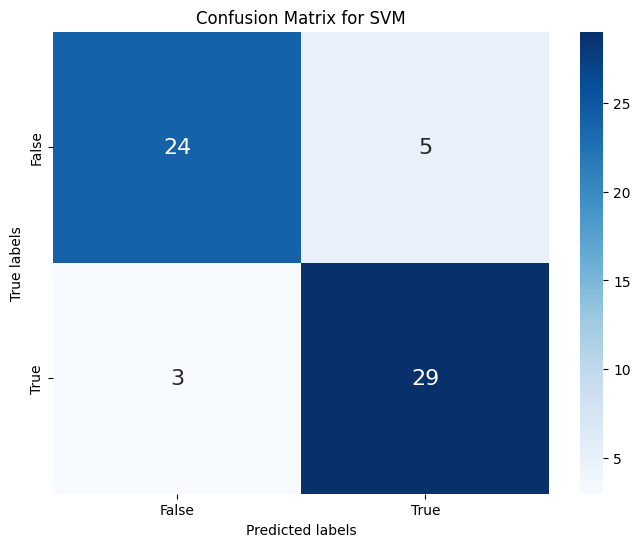

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define labels
labels = ['False', 'True']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"fontsize": 16}, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for SVM')
plt.show()

3 false negative cases misclassification is concerning because it means that individuals who are actually at risk of heart disease may go unnoticed and untreated. As a result, there is a risk of delayed diagnosis and missed opportunities for early intervention, potentially leading to adverse health outcomes for patients.

Additionally, four false positives indicate further instances of misclassification, which could potentially result in unnecessary medical interventions and increased patient anxiety.

Overall,Support Vector Machine (SVM), a robust algorithm for classification tasks, was employed in heart disease analysis to accurately discern individuals with and without heart disease. Utilizing a pipeline with StandardScaler preprocessing and SVM classification, hyperparameter tuning via grid search optimizes model performance. The SVM model achieves an accuracy of approximately 88.52% on the testing set, with precision values of 0.89 for class 0 and 0.88 for class 1, alongside recall rates of 0.86 for class 0 and 0.91 for class 1. Despite its strong performance, the occurrence of three false negatives and four false positives highlights potential misclassifications, underscoring the importance of improving model sensitivity and specificity for accurate diagnosis and treatment decisions.

# Gaussian Naive Bayes (GNB)


Next lets perform  a probabilistic classification algorithm widely utilized in heart disease analysis, aiming to predict the likelihood of heart disease based on various risk factors. Leveraging the assumption of feature independence, GNB efficiently estimates the conditional probability of each class given the feature values, making it computationally efficient and well-suited for datasets with continuous features such as cholesterol levels and resting blood pressure. Despite its simplicity, GNB exhibits robust performance in heart disease prediction, providing valuable insights into the underlying patterns and contributing to informed decision-making in clinical settings.

A pipeline incorporating preprocessing with StandardScaler and classification using Gaussian Naive Bayes (GNB) is established. This pipeline efficiently scales the data and fits the classifier simultaneously. Predictions were made on the testing set, facilitating efficient heart disease prediction.

In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step: StandardScaler
    ('gnb', GaussianNB())  # Gaussian Naive Bayes classifier
])

# Train the pipeline (automatically scales the data and fits the classifier)
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)


### Accuracy

In [ ]:
# Calculate accuracy
accuracy_gnb = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_gnb)

Accuracy: 0.8688524590163934


The pipeline achieved an accuracy of approximately 86.89% on the testing set, indicating its effectiveness in predicting heart disease.

### Classification Report

In [ ]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



The observed results indicates the following:

*   Accuracy:
The overall accuracy of the gradient boosting model on the test set is approximately 87%. This indicates that the model correctly predicts the class labels for about 87% of the instances in the test dataset

* Classification Report:

    * Precision: Precision measures the proportion of true positive predictions among all positive predictions. For class 0, the precision is 84%, indicating that 78% of the instances predicted as class 0 are actually class 0. For class 1, the precision is 90%, meaning that 86% of the instances predicted as class 1 are truly class 1

    * Recall: Recall (also known as sensitivity) measures the proportion of true positive instances that were correctly identified by the model. For class 0, the recall is 90%, indicating that 90% of all actual class 0 instances were correctly predicted as class 0. For class 1, the recall is 84%, meaning that 84% of all actual class 1 instances were correctly predicted as class 1

    * F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For both classes, the F1-score is approximately 87%, suggesting that the model achieves a good balance between precision and recall for both classes

    * Support: Support indicates the number of instances of each class in the test set. For class 0, there are 29 instances, and for class 1, there are 32 instances


### Confusion Matrix

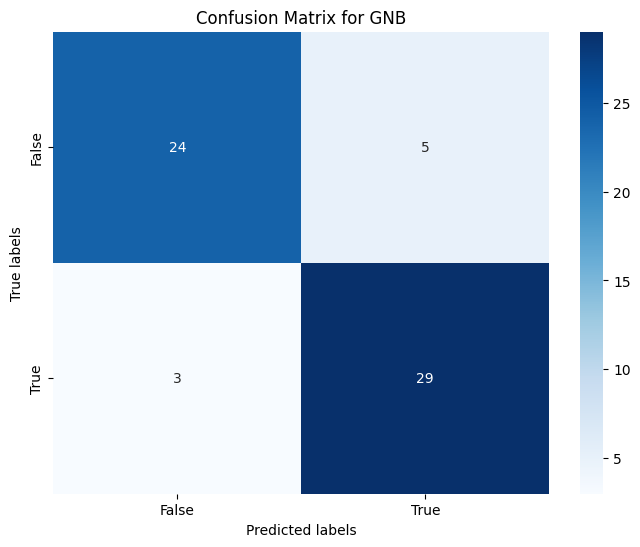

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
# Define labels
labels = ['False', 'True']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for GNB')
plt.show()

* False Negative (FN) = 5: This means that 5 individuals with heart disease were incorrectly classified as not having the condition. This is concerning as it indicates that the model failed to identify these individuals who are at risk of heart disease, potentially leading to delayed diagnosis and treatment.

* False Positive (FP) = 3: This means that 3 individuals without heart disease were incorrectly classified as having the condition. While less critical than false negatives, false positives can lead to unnecessary anxiety and medical interventions for individuals who are actually healthy.

Overall, the Gaussian Naive Bayes (GNB) algorithm, utilized for heart disease analysis, achieves an 86.89% accuracy on the test set through a preprocessing pipeline with StandardScaler and GNB classification. The model demonstrates balanced performance with precision values of 84% for class 0 and 90% for class 1, along with recall rates of 90% for class 0 and 84% for class 1, resulting in a harmonious F1-score of approximately 87% for both classes. Despite its strong accuracy, the report acknowledges areas for improvement, such as 5 false negatives and 3 false positives, highlighting the need for refinement in predictive performance.

# Decision tree



Decision Tree offers interpretability, allowing us to understand the decision-making process behind predicting heart diseases in the case of this dataset. Since decision trees automatically rank feature importance, which helps in identifying the most influential factors in heart disease prediction. Decision trees also handle non-linear relationships, which are important in capturing the complex interactions between various health metrics and heart disease. Therefore, integrating this model is beneficial for this dataset, as it effectively balances interpretability and predictive power.

### Cross-Validation



The initial step is to evaluate the baseline performance of the Decision Tree model. The Cross-Validation approach on the training set can be used to estimate the model performance. Through 5-fold cross-validation, the dataset was divided into five subsets, with each subset serving as a validation set once while the model was trained on the remaining data.

In [ ]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perform cross-validation to evaluate the model
cross_val_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)

# Calculate the mean and standard deviation of the cross-validation scores
cv_mean = np.mean(cross_val_scores)
cv_std = np.std(cross_val_scores)

# Display initial cross-validation scores
print("Mean Accuracy:", cv_mean)
print("Standard Deviation of Cross-Validation Scores:", cv_std)

Mean Accuracy: 0.7437925170068027
Standard Deviation of Cross-Validation Scores: 0.04077786594989549


The provided Cross-Validation results indicate the model performace across different subsets of training data. Here are the results:

  * Mean Accuracy: The mean accuracy score is the average of the accuracy scores from all the folds. The mean accuracy is approximately 0.7438, indicating that on average, the model correctly predicts the target variable about 74.38% of the time on the unseen data.

  * Standard Deviation of Cross Validation Scores: The standard deviation is approximately 0.0408, suggesting that the model performance varies relatively little across different fold. A lower deviation implies more consistent performance across folds.

### Hyperparameter Tuning



Having the understanding of model's baseline performance, the next step would be to optimize its hyperparameters in order to further enhance its predictive capabilities. GridCV was employed to find the best combinations of hyperparameters. The following are the results:

In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
# Print the best parameters
print(f'Best parameters found: {grid_search.best_params_}')

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


After the evaluation of 108 candidates combinations across 540 fits, GridCV identified the optimal set of hyperparamters which are as follows:
  * criterion: 'entropy'
  * max_depth: None
  * min_samples_leaf: 1
  * min_samples_split: 2

The optimal hyperparameters can be used for refining the Decision Tree Classifier for an enhanced predictive capabilities.

### Evaluating Performace on Test Set:



After performing hyperparameter tuning and using the optimal estimators, the next step is to evaluate the performance of the Decision Tree Classifier on the test set and visualize the resulting decision tree.

In [ ]:
# Use the best estimator
best_classifier = grid_search.best_estimator_

# Predict on the test set with the best estimator
y_pred = best_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred)
print(f'Test set accuracy: {accuracy_dt:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Test set accuracy: 0.8197
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



The observed results indicates the following:

  * Test Set Accuracy: The accuracy achieved on the test set is approximately 81.97%. This indicates that the model correctly predicts the target variable for about 81.97% of the samples in the test set.

  * The classification report provides insights into the model performance across different classes.
    * Class 0: The precision for class 0 (No Heart Disease) is 0.76 indicating that 76% of the predictions are true negatives, while the recall is 0.90, signifying that 90% of true (No Heart Disease) samples are correctly identified.

    * Class 1: For class 1 (Heart Disease) the precision is 0.89, indicating 89% of the predictions are true positives, while the recall is 0.75 suggesting that 75% of true Heart Disease samples are correctly identified.

    * The F1-score in both classes is approximately 0.82 reflecting a balance of precision and recall for the overall model performance.


### Confusion Matrix

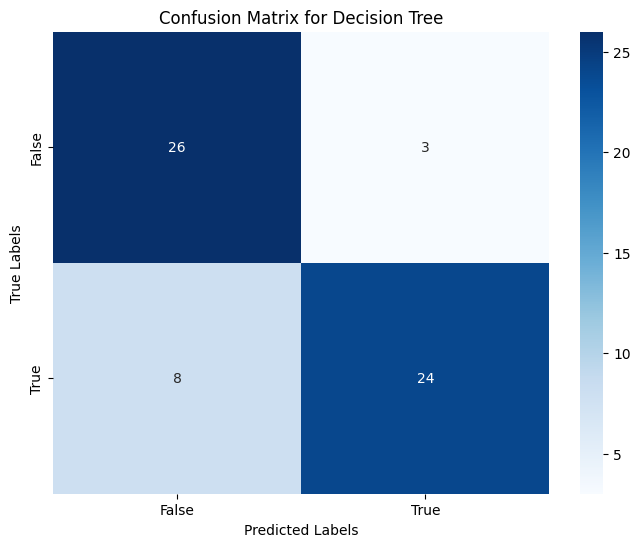

In [ ]:
# Predictions using the best decision tree model
y_pred_dt = best_classifier.predict(X_test)

# Generate the confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plotting the confusion matrix using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

The following observations can be made from the Confusion Matrix for the Decision Tree:
  * 24 patients with heart disease were correctly identified (True Positives).
  * 26 patients without heart disease were correctly identified (True Negatives).
  * 3 patients without heart disease were incorrectly identified as having it (False Positives).
  * 8 patients with heart disease were incorrectly identified as not having it (False Negatives).

### Decision Tree Visualization



The Decision Tree visualization above provides insights into how the model makes its decisions based on the features from the dataset, using splits to classify patients based on their risk of heart diseases.

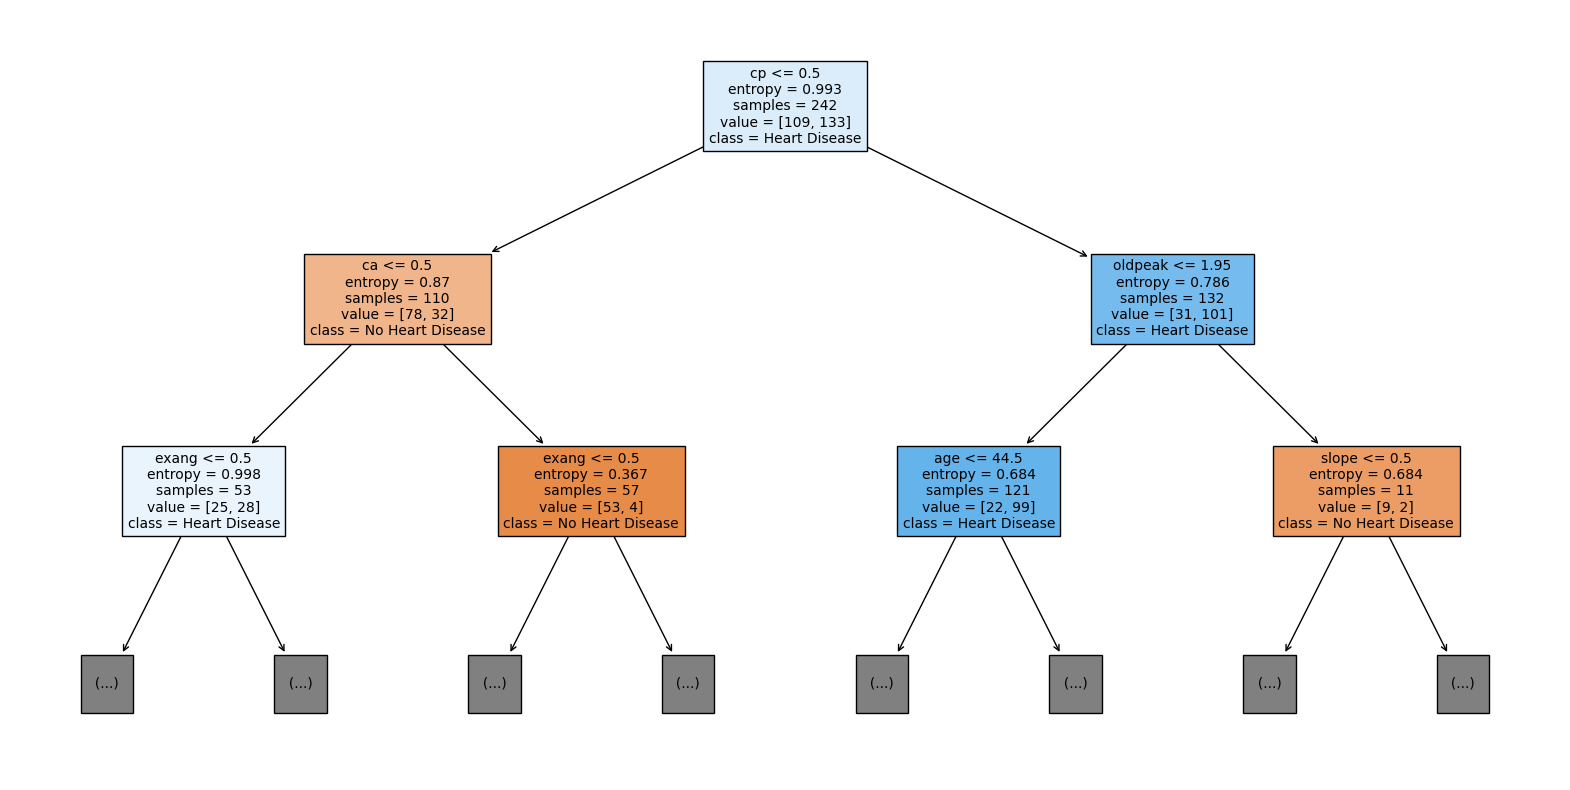

In [ ]:
# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(best_classifier, filled=True, feature_names=X.columns, class_names=["No Heart Disease", "Heart Disease"], fontsize=10, max_depth=2)
plt.show()

At the root of the tree the model splits the data based on the feature 'cp' (Chest pain type) which is the most significant indicator; lower values suggest no heart disease, while higher values suggest heart disease. Further divisions in the tree enhances the classification by considering factors like the count of main blood vessels detected by fluoroscopy 'ca', the presence of angina from exercise 'exang', the level of ST depression 'oldpeak', patient age, and the ST segment 'slope' during peak exercise. At each decision node orange represents the absence of heart disease and blue for the presences.

Overall, the process of model development, starting from initial cross validation to the final evaluation on test set after hyperparameter tuning, demonstrates a continuous refinement and improvement of the model performance. The significant increase from cross-validation accuracy of 74.38% to the accuracy after hyperparameter tuning of test set at 81.97% indicates a notable enhancement in predictive performance and the effectiveness of the hyperparameter tuning process in optimizing the model.


# Random Forest



Random Forest is the next model which combines multiple decision tree and reduces the overfitting and improves the accuracy. It also analyzes the feature importance and identifies the influential factors in predicting heart diseases.

### Cross-Validation


The first step is to find the baseline performance of Random Forest model through 5-fold cross validation on the training data.

In [ ]:
# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Perform cross-validation to evaluate the model
cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the cross-validation scores
cv_mean = np.mean(cv_scores)
cv_std = np.std(cv_scores)

print("Mean Accuracy:", cv_mean)
print("Standard Deviation of Cross-Validation Scores:", cv_std)

Mean Accuracy: 0.8057823129251702
Standard Deviation of Cross-Validation Scores: 0.009979820214498928


Based on the Cross Validation for random forest model it averaged an accuracy of approximately 80.6% with the standard deviation of about 1.0% across the 5 folds. This indicates a stable balance performance across different subsets of training data.

### Hyperparameter Tuning


The next step would be to optimize the hyperparameters in order to further enhance the model predictive capabilities.

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the Grid Search model
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)
# Print the best parameters
print(f'Best parameters found: {grid_search.best_params_}')

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


After evaluating all parameters combinations, the grid search determined that the optimal combination of hyperparamters for the Random Forest model is:
  * max_depth: None
  * min_samples_leaf: 2
  * min_samples_split: 2
  * n_estimators: 200

The optimal hyperparameters can be used for refining the Random Forest Classifier for an enhanced predictive capabilities.

### Evaluating Performace on Test Set:



After performing hyperparameter tuning and using the optimal estimators, the next step is to evaluate the performance of the Random Forest Classifier on the test set.

In [ ]:
# Extract the best estimator
best_rf = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_rf)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8688524590163934
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



The observed results indicates the following:
  * Accuracy: The accuracy achieved on the test set is approximately 0.8689 which indicates that the model predicts the target variable for about 86.99% of the samples in the test set.

  * The classification report indicates the following:
      * Precision: The precision for predicting class 0 (No heart disease) is 89% and class 1 (Heart Disease) is 85% suggesting a high percentage of the prediction made by model for both classes.

      * Recall: The recall for (No heart disease) is 83% and (Heart disease) is 91% indicating a high proportion of actual instances of both classes are correctly identified by the model.

      * F1-Score: The F1-score balances the precision and recall which is approximately 0.86 for class 0 and 0.88 for class1 reflecting the model ability to balance between true positives and minimizing false positives.

### Confusion Matrix



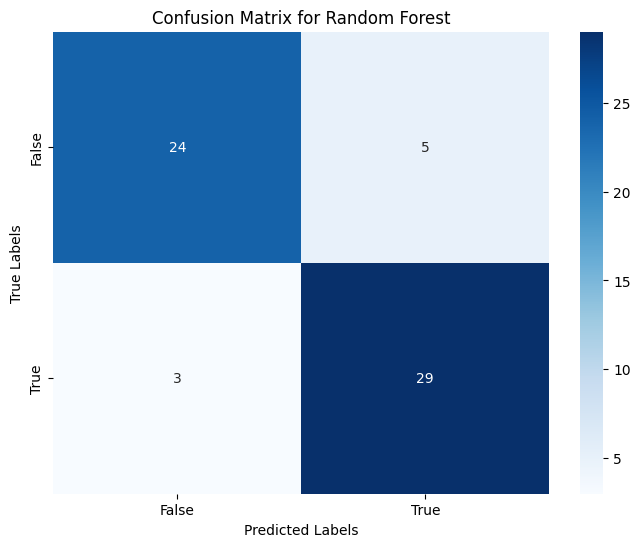

In [ ]:
# Predictions using the best random forest model
y_pred_rf = best_rf.predict(X_test)

# Generate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plotting the confusion matrix using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest')
plt.show()


The following observations can be made from the Confusion Matrix for the Random Forest:
  * 29 patients with heart disease were correctly identified (True Positives).
  * 24 patients without heart disease were correctly identified (True Negatives).
  * 5 patients without heart disease were incorrectly identified as having it (False Positives).
  * 3 patients with heart disease were incorrectly identified as not having it (False Negatives).


### Feature Importance in Random Forest Model






The visualization of feature importance for the Random Forest model helps to understand which feature are more influential in predicting the presence of heart disease.


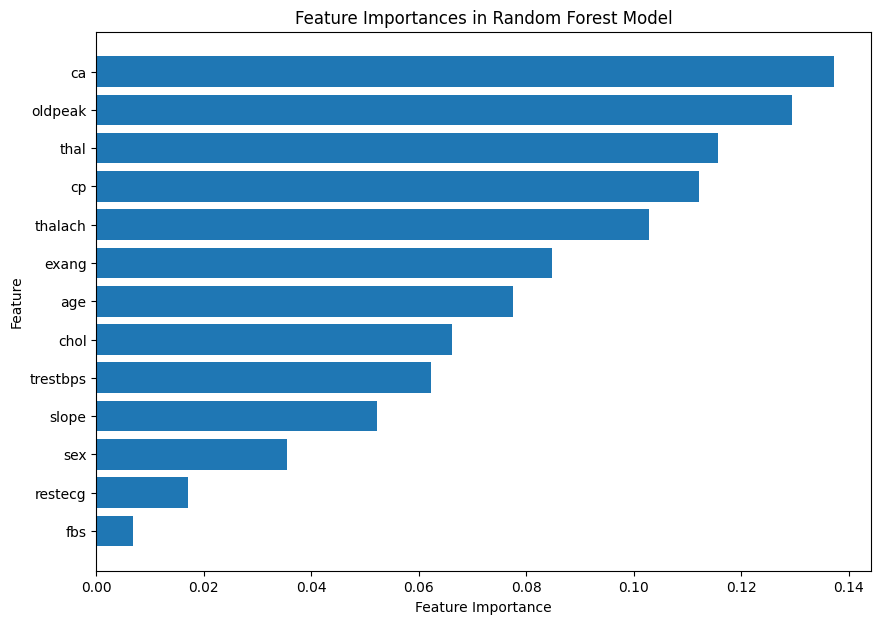

In [ ]:
# Get feature importances
feature_importances = best_rf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = X.columns[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 7))
plt.barh(range(X.shape[1]), feature_importances[sorted_indices], align='center')
plt.yticks(range(X.shape[1]), sorted_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

The bar chart illustrate the importances determined by Random Forest model, which helps to understand which variables have the most influence on model predicitons. The number of major vessels colored by fluoroscopy (ca) has the highest importance score, suggesting that it is the most influential predictor in the model followed by ST depression induced by exercise relative to rest (old peak). The feature at the bottom of the chart such as fasting blood sugar (fbs), resting electocardiographic results (restecg), and sex have the lowest importance suggesting these variales have the least influence on the model prediction.

Overall, the Random Forest model displayed a consistent performance, with cross-validation yielding a mean acccuracy of 80.6% to the hyperparamter tuining optimized the model, leading to an accuracy of 86.9% on the test set. High precision and recall values for both classes indicated accurate classification. Therefore, the Random Forest model highlighted a robust performance in prediciting the heart disease.

# Gradient Boosting




Gradient boosting is a popular machine learning technique used for both regression and classification tasks. It's an ensemble learning method that combines the predictions of several weak learners, typically decision trees, to create a strong predictive model.

Boosting is a method of converting weak learners into strong learners. In boosting, each new tree is a fit on a modified version of the original data set. It strongly relies on the prediction that the next model will reduce prediction errors when blended with previous ones. The main idea is to establish target outcomes for this upcoming model to minimize errors.

Gradient Boosting trains many models in a gradual, additive and sequential manner. The term gradient boosting emerged because every case’s target outcomes are based on the gradient’s error with regards to the predictions. Every model reduces prediction errors by taking a step in the correct direction.

### Cross-Validation











Cross-validation is a technique used to evaluate machine learning models by partitioning the dataset into multiple subsets, training the model on some of these subsets, and testing it on the remaining ones. This allows for a more reliable estimation of the model's generalization performance compared to a single train-test split. By calculating the mean accuracy and standard deviation across multiple folds of cross-validation, we gain insights into the classifier's overall effectiveness and consistency in handling unseen data.

In this code, we're employing 5-fold cross-validation to assess the performance of a Gradient Boosting classifier.


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Perform cross-validation to evaluate the model
cv_scores_gb = cross_val_score(gb_clf, X_train, y_train, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the cross-validation scores
cv_mean_gb = np.mean(cv_scores_gb)
cv_std_gb = np.std(cv_scores_gb)

print("Mean Accuracy:", cv_mean_gb)
print("Standard Deviation of Cross-Validation Scores:", cv_std_gb)


Mean Accuracy: 0.8096938775510203
Standard Deviation of Cross-Validation Scores: 0.02876940841692629


The output indicates that the mean accuracy of the Gradient Boosting classifier across 5-fold cross-validation is approximately 0.810, suggesting that, on average, the classifier correctly predicts the target variable for about 81% of the instances in the training data.

Additionally, the standard deviation of the cross-validation scores is around 0.029, implying a relatively low variability in performance across different folds.

This indicates that the model's accuracy is consistent across various subsets of the training data, providing confidence in its generalization capability.

### Hyperparameter Tuning


The hyperparameters of a Gradient Boosting classifier are tuned using Grid Search Cross-Validation to find the combination that maximizes accuracy. It initializes the search with a parameter grid, fits the model to the training data, and prints the best hyperparameters found.

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05,0.01],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the Grid Search model
grid_search_gb = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the Grid Search to the data
grid_search_gb.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters found: {grid_search_gb.best_params_}')

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found: {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


The output indicates that Grid Search Cross-Validation was performed with 5 folds for each of the 72 candidate combinations of hyperparameters. After evaluating the model's performance, the best combination of hyperparameters found was: learning rate of 0.1, maximum depth of 10, minimum samples per leaf of 2, minimum samples per split of 5, and 200 estimators. These hyperparameters resulted in the highest accuracy on the validation data among all tested combinations.

### Evaluating Performance on Test Set:





After performing hyperparameter tuning and using the optimal estimators, the next step is to evaluate the performace of Gradient Boosting Classifier on the test set.

In [ ]:
# Extract the best estimator
best_gb = grid_search_gb.best_estimator_

# Predict on the test set
y_predgb = best_gb.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_predgb)
print('Accuracy:', accuracy_gb)
print('Classification Report:')
print(classification_report(y_test, y_predgb))

Accuracy: 0.819672131147541
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



The observed results indicates the following:

*   Accuracy:
The overall accuracy of the gradient boosting model on the test set is approximately 81.97%. This indicates that the model correctly predicts the class labels for about 81.97% of the instances in the test dataset

* Classification Report:

    * Precision: Precision measures the proportion of true positive predictions among all positive predictions. For class 0, the precision is 78%, indicating that 78% of the instances predicted as class 0 are actually class 0. For class 1, the precision is 86%, meaning that 86% of the instances predicted as class 1 are truly class 1

    * Recall: Recall (also known as sensitivity) measures the proportion of true positive instances that were correctly identified by the model. For class 0, the recall is 86%, indicating that 86% of all actual class 0 instances were correctly predicted as class 0. For class 1, the recall is 78%, meaning that 78% of all actual class 1 instances were correctly predicted as class 1

    * F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For both classes, the F1-score is approximately 82%, suggesting that the model achieves a good balance between precision and recall for both classes

    * Support: Support indicates the number of instances of each class in the test set. For class 0, there are 29 instances, and for class 1, there are 32 instances


### Confusion Matrix:



The confusion matrix helps evaluate the model's accuracy and identify areas for improvement.

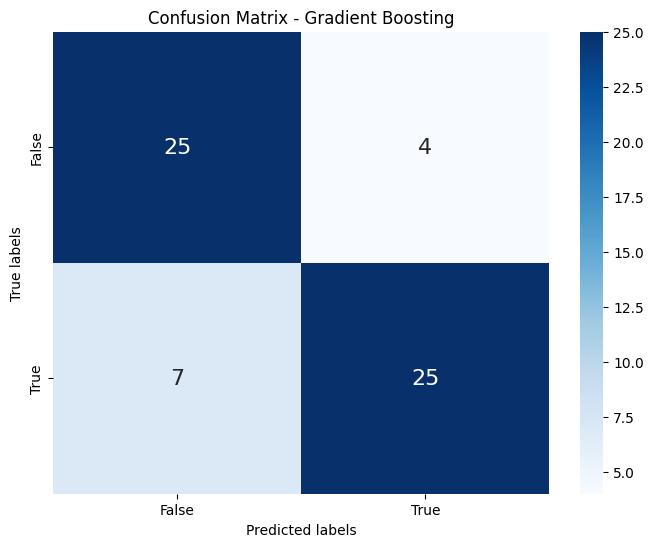

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm_gb = confusion_matrix(y_test, y_predgb)

# Define labels
labels = ['False', 'True']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', annot_kws={"fontsize": 16}, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

False Negative (FN): The model incorrectly predicted 7 cases as not having heart disease when they actually do. These are instances where the model failed to detect the presence of heart disease in patients who actually have it. False negatives are particularly concerning in the context of heart disease prediction because failing to detect the disease can delay necessary medical treatment, potentially leading to adverse health outcomes.

False Positive (FP): The model incorrectly predicted 4 cases as having heart disease when they actually do not. While false positives are less critical than false negatives in this context, they can still have consequences such as unnecessary medical tests or treatments for patients who are not actually at risk of heart disease.

Overall, this interpretation highlights the importance of carefully considering both false negatives and false positives when assessing the performance of a heart disease prediction model. The goal is to minimize both types of errors to ensure accurate and reliable predictions.









### Feature Importance in Gradient Boosting Model




The visualization of feature importance for the Gradient Boosting Model helps to understand which feature are more influential in predicting the presence of heart disease.

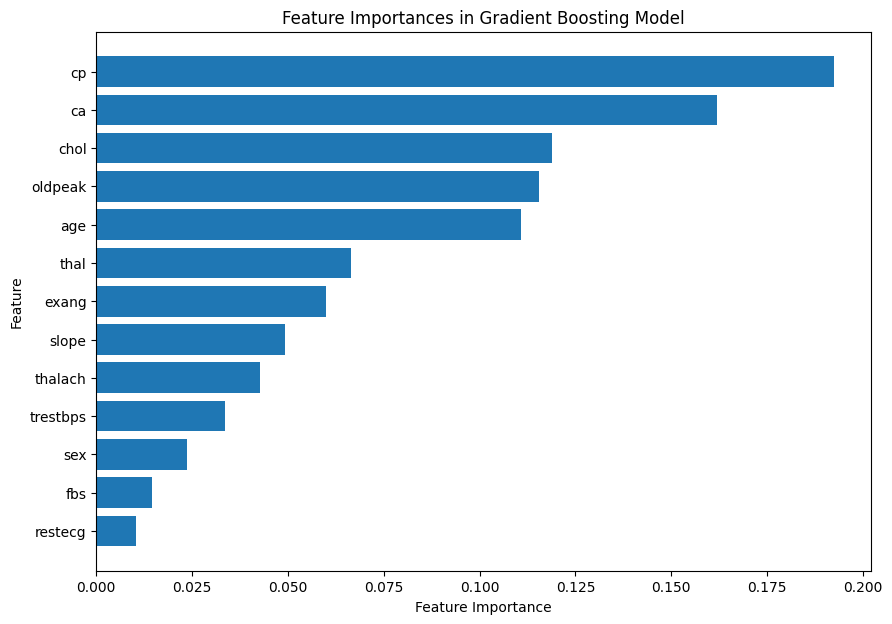

In [ ]:
# Get feature importances
feature_importances_gb = best_gb.feature_importances_

# Sort the indices in descending order based on feature importances
sorted_indices_gb = np.argsort(feature_importances_gb)[::-1]

# Sort the feature names based on their importance
sorted_features_gb = X.columns[sorted_indices_gb]

# Plot the feature importances
plt.figure(figsize=(10, 7))
plt.barh(range(X.shape[1]), feature_importances_gb[sorted_indices_gb], align='center')
plt.yticks(range(X.shape[1]), sorted_features_gb)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Gradient Boosting Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

The bar chart illustrate the importances determined by Gradient boosting model, which helps to understand which variables have the most influence on model predicitons. The Chest pain type (cp) has the highest importance score, suggesting that it is the most influential predictor in the model followed by The number of major vessels colored by fluoroscopy (ca) . The feature at the bottom of the chart such as fasting blood sugar (fbs), resting electocardiographic results (restecg), and sex have the lowest importance suggesting these variables have the least influence on the model prediction.

# Summary

The gradient boosting model was meticulously trained, validated, and evaluated on a dataset likely related to heart disease prediction. Here's a summary of its key aspects:

* Cross Validation: The model exhibited consistent performance across different subsets of the training data, with an average accuracy of approximately 81% and low variability (standard deviation around 0.029) across folds.

* Hyperparameter Tuning: Exhaustive hyperparameter tuning using Grid Search Cross-Validation was performed, resulting in the selection of optimal hyperparameters: learning rate of 0.1, maximum depth of 10, minimum samples per leaf of 2, minimum samples per split of 5, and 200 estimators, which led to improved model accuracy.

* Performance on Test Set: On the unseen test set, the model achieved an accuracy of approximately 81.97%. The classification report indicated balanced precision, recall, and F1-score for both classes (0 and 1), with class 1 having slightly higher precision but lower recall compared to class 0.

* Confusion Matrix Analysis: The model's confusion matrix revealed 7 false negatives and 4 false positives, indicating areas where the model can be improved, especially in reducing false negatives to prevent missing cases of heart disease.

* Feature Importance: The model identified "Chest pain type (cp)" as the most influential predictor, followed by "The number of major vessels colored by fluoroscopy (ca)". Conversely, features like "fasting blood sugar (fbs)", "resting electrocardiographic results (restecg)", and "sex" were found to have minimal influence on model predictions.

In summary, the gradient boosting model demonstrates robust performance in predicting heart disease, with notable attention to tuning hyperparameters and interpreting feature importance to optimize predictive accuracy and clinical utility. Further refinement may be necessary to minimize false negatives and enhance the model's clinical applicability.


# AdaBoost




AdaBoost, short for Adaptive Boosting, is a popular ensemble learning algorithm widely used for classification tasks.
AdaBoost combines multiple weak learners, typically decision trees, to create a robust and accurate classifier. Unlike traditional ensemble methods that assign equal weights to all classifiers, AdaBoost adapts its weights based on the performance of each weak learner, focusing more on misclassified instances in subsequent iterations. By iteratively adjusting the weights of training instances and combining the weak learners, AdaBoost produces a strong classifier that effectively learns from its mistakes and achieves high predictive accuracy.

### Cross-Validation



In this code, we're employing 5-fold cross-validation to assess the performance of a AdaBoost classifier.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost classifier
ada_clf = AdaBoostClassifier(random_state=42)

# Perform cross-validation to evaluate the model
cv_scores_ada = cross_val_score(ada_clf, X_train, y_train, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the cross-validation scores
cv_mean_ada = np.mean(cv_scores_ada)
cv_std_ada = np.std(cv_scores_ada)

print("Mean Accuracy:", cv_mean_ada)
print("Standard Deviation of Cross-Validation Scores:", cv_std_ada)

Mean Accuracy: 0.7604591836734694
Standard Deviation of Cross-Validation Scores: 0.026643749697368886


The output indicates that the mean accuracy of the AdaBoost classifier across 5-fold cross-validation is approximately 0.7604, suggesting that, on average, the classifier correctly predicts the target variable for about 76% of the instances in the training data.

Additionally, the standard deviation of the cross-validation scores is around 0.026, implying a relatively low variability in performance across different folds.

This indicates that the model's accuracy is consistent across various subsets of the training data, providing confidence in its generalization capability.

### Hyperparameter Tuning


The hyperparameters of a AdaBoost classifier are tuned using Grid Search Cross-Validation to find the combination that maximizes accuracy. It initializes the search with a parameter grid, fits the model to the training data, and prints the best hyperparameters found.

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05, 0.01]
}

# Initialize the Grid Search model
grid_search_ada = GridSearchCV(estimator=ada_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the Grid Search to the data
grid_search_ada.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters found: {grid_search_ada.best_params_}')


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters found: {'learning_rate': 0.05, 'n_estimators': 100}


The Grid Search with cross-validation was performed to find the best combination of hyperparameters for the AdaBoost classifier. The hyperparameters that were tuned include the number of estimators (trees) in the ensemble (n_estimators) and the learning rate. The grid search evaluated a total of 6 different combinations of these hyperparameters.

After fitting the grid search to the training data, the best parameters found were a learning rate of 0.05 and 100 estimators. This means that the optimal combination for this AdaBoost model involves a moderate learning rate of 0.05 and a relatively moderate number of estimators (100 trees) in the ensemble.

This information is crucial for fine-tuning the AdaBoost model's performance. By selecting the best hyperparameters, we can optimize the model's ability to generalize well to new, unseen data and improve its overall predictive accuracy.








### Evaluating Performance on Test Set:



After performing hyperparameter tuning and using the optimal estimators, the next step is to evaluate the performace of AdaBoost Classifier on the test set.

In [ ]:
# Extract the best estimator
best_ada = grid_search_ada.best_estimator_

# Predict on the test set
y_predada = best_ada.predict(X_test)

# Evaluate the model
accuracy_ada = accuracy_score(y_test, y_predada)
print('Accuracy:', accuracy_ada)
print('Classification Report:')
print(classification_report(y_test, y_predada))


Accuracy: 0.8360655737704918
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



The observed results indicates the following:

*   Accuracy:
The accuracy of the model on the test set is approximately 83.61%. This indicates that about 83.61% of the instances in the test set were correctly classified by the AdaBoost model

* Classification Report:

    * Precision: Precision measures the proportion of true positive predictions among all positive predictions. For class 0 (no heart disease), the precision is 0.81, indicating that 81% of the instances predicted as not having heart disease were actually true negatives. For class 1 (heart disease), the precision is 0.87, indicating that 87% of the instances predicted as having heart disease were actually true positives

    * Recall: Recall measures the proportion of true positive predictions among all actual positives. For class 0, the recall is 0.86, indicating that 86% of the instances that actually do not have heart disease were correctly identified. For class 1, the recall is 0.81, indicating that 81% of the instances that actually have heart disease were correctly identified

    * F1-score: The F1-score is the harmonic mean of precision and recall, providing a balanced measure of a classifier's performance. The weighted average F1-score is approximately 0.84 for both classes

    * Support: The support indicates the number of instances in each class in the test set.


### Confusion Matrix:



The confusion matrix helps evaluate the model's accuracy and identify areas for improvement.

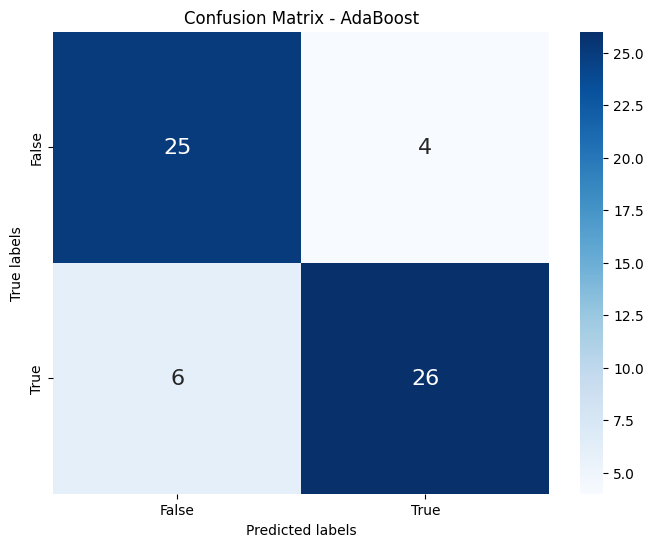

In [ ]:
# Calculate the confusion matrix
cm_ada = confusion_matrix(y_test, y_predada)

# Define labels
labels = ['False', 'True']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Blues', annot_kws={"fontsize": 16}, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - AdaBoost')
plt.show()

False Negative (FN): The model incorrectly predicted 6 cases as not having heart disease when they actually do. These are instances where the model failed to detect the presence of heart disease in patients who actually have it. False negatives are particularly concerning in the context of heart disease prediction because failing to detect the disease can delay necessary medical treatment, potentially leading to adverse health outcomes.

False Positive (FP): The model incorrectly predicted 4 cases as having heart disease when they actually do not. While false positives are less critical than false negatives in this context, they can still have consequences such as unnecessary medical tests or treatments for patients who are not actually at risk of heart disease.

Overall, this interpretation highlights the importance of carefully considering both false negatives and false positives when assessing the performance of a heart disease prediction model. The goal is to minimize both types of errors to ensure accurate and reliable predictions.









### Feature Importance in AdaBoost Model




The visualization of feature importance for the AdaBoost model helps to understand which feature are more influential in predicting the presence of heart disease.

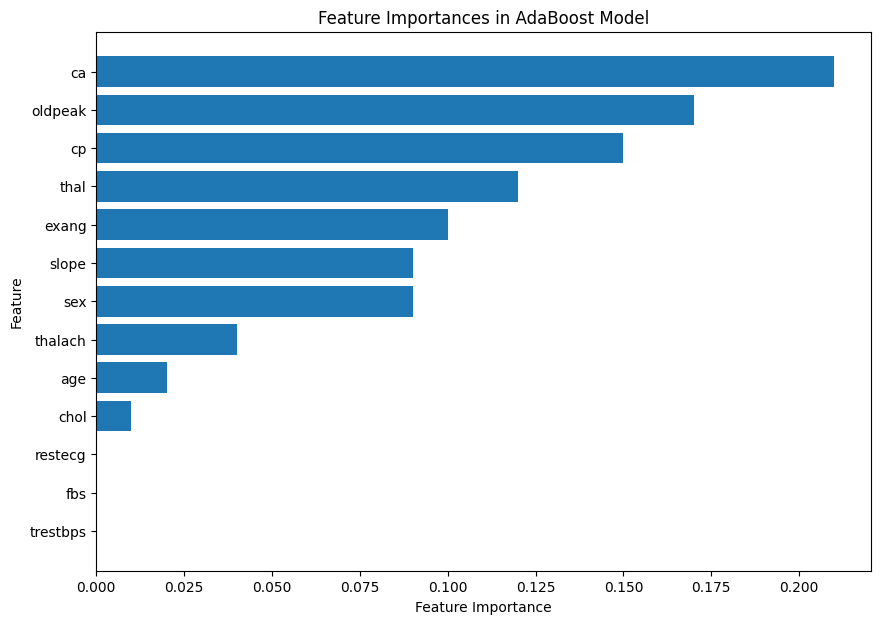

In [ ]:
# Get feature importances
feature_importances_ada = best_ada.feature_importances_

# Sort the indices in descending order based on feature importances
sorted_indices_ada = np.argsort(feature_importances_ada)[::-1]

# Sort the feature names based on their importance
sorted_features_ada = X.columns[sorted_indices_ada]

# Plot the feature importances
plt.figure(figsize=(10, 7))
plt.barh(range(X.shape[1]), feature_importances_ada[sorted_indices_ada], align='center')
plt.yticks(range(X.shape[1]), sorted_features_ada)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in AdaBoost Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

The bar chart illustrate the importances determined by AdaBoost model, which helps to understand which variables have the most influence on model predictons. The number of major vessels colored by fluoroscopy (ca) has the highest importance score, suggesting that it is the most influential predictor in the model followed by ST depression induced by exercise relative to rest (old peak) . The feature at the bottom of the chart such as Serum cholesterol (chol), age, and Maximum heart rate achieved(thalach)  have the lowest importance suggesting these variales have the least influence on the model prediction.


# Summary
The summary of the AdaBoost model is as follows:

* Cross Validation: The model demonstrated stable performance across different subsets of the training data, with a mean accuracy of approximately 76% and a low standard deviation of around 0.027, indicating consistent accuracy.

* Hyperparameter Tuning: Grid Search Cross-Validation was employed to fine-tune hyperparameters. The best combination was found to be a learning rate of 0.05 and 100 estimators (trees) in the ensemble. This combination suggests moderate learning and a moderate number of estimators for optimal performance.

* Performance on Test Set: The model achieved an accuracy of approximately 83.61% on the unseen test set. Both precision and recall were balanced for both classes (0 and 1), with class 1 having slightly lower recall but higher precision compared to class 0.

* Confusion Matrix Analysis: The model exhibited 6 false negatives and 4 false positives. False negatives, where the model failed to detect heart disease in patients who actually had it, are of particular concern due to potential delays in medical treatment. False positives, though less critical, can still lead to unnecessary medical interventions.

* Feature Importance: Feature importance analysis revealed that "The number of major vessels colored by fluoroscopy (ca)" had the highest importance score, indicating it was the most influential predictor in the model. "ST depression induced by exercise relative to rest (old peak)" followed closely. Conversely, features like "Serum cholesterol (chol)", "age", and "Maximum heart rate achieved (thalach)" were deemed less influential in model predictions.

In summary, the AdaBoost model showcases robust performance in predicting heart disease, with a focus on optimizing hyperparameters and interpreting feature importance to enhance predictive accuracy and identify influential predictors. Further attention may be needed to minimize false negatives and optimize model performance for clinical application.



# Model Comparison




The final step is to compare all the models to determine which model is the best in predicting heart disease. An ROC Curve and a table comparing all the models' accuracy scores, False Negatives, and Recall Scores for positive heart disease will be compared.

### ROC Curve

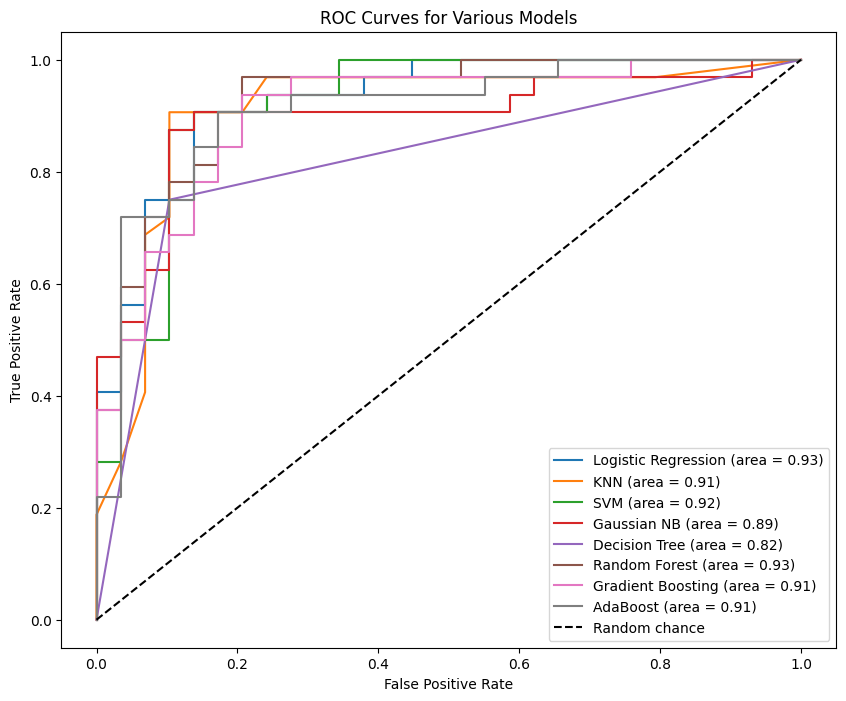

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve and AUC for each model
models = [
    ("Logistic Regression", best_model, X_test_scaled),
    ("KNN", best_knn, X_test_scaled),
    ("SVM", best_svm_model, X_test),
    ("Gaussian NB", pipeline, X_test),
    ("Decision Tree", best_classifier, X_test),
    ("Random Forest", best_rf, X_test),
    ("Gradient Boosting", best_gb, X_test),
    ("AdaBoost", best_ada, X_test)
]

plt.figure(figsize=(10, 8))

for name, model, data in models:
    if hasattr(model, "decision_function"):
        y_scores = model.decision_function(data)
    else:
        y_scores = model.predict_proba(data)[:, 1]  # score for the positive class

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Various Models')
plt.legend(loc='lower right')
plt.show()


The following observations can be made from the ROC Curve for all the 8 models used to predict the likelihood of heart disease diagnosis. All models show good to excellent ability to distinguish between the two classes, with Logistic Regression and Random Forest standing out as the top performers, each with an AUC score of 0.93, indicating a high degree of predictive accuracy. Other models including KNN, SVM, Gradient Boosting, and AdaBoost also show significantly high performance, while the Decision Tree model has the lowest performance compared to the rest of the models.

The table below compares all the models' accuracy scores, False Negatives, and Recall Scores for positive heart disease:

In [ ]:
# Define the data
data = {
    'Model': ['KNN','Support Vector Machine','Decision Tree','AdaBoost','Gaussian NB','Random Forest', 'Gradient Boosting', 'Logistic Regression'],
    'Accuracy Score': [accuracy_knn, accuracy_svm,  accuracy_dt, accuracy_ada, accuracy_gnb, accuracy_rf, accuracy_gb, accuracy_log],
    'Recall for Positive Heart Disease': [0.91,0.91,0.75,0.81,0.84,0.91,0.78,0.84],
    'False Negative':[3,3,8,6,5,3,7,5]
}

# Create a DataFrame
model_comparison_df = pd.DataFrame(data)

# Display the DataFrame
model_comparison_df

,Model,Accuracy Score,Recall for Positive Heart Disease,False Negative
0,KNN,0.885246,0.91,3
1,Support Vector Machine,0.885246,0.91,3
2,Decision Tree,0.819672,0.75,8
3,AdaBoost,0.836066,0.81,6
4,Gaussian NB,0.868852,0.84,5
5,Random Forest,0.868852,0.91,3
6,Gradient Boosting,0.819672,0.78,7
7,Logistic Regression,0.852459,0.84,5


Based on the table above, the highest performing models are KNN and SVM, with an accuracy score of approximately 88.5%. They both exhibit a high recall of 0.91 for positive heart disease cases and a low count of false negatives. The Random Forest model also shows high accuracy, approximately 86.9%, matching SVM and KNN, with a recall score of 0.91 and a low count of false negatives. The Gaussian Naive Bayes model demonstrates good performance with an accuracy of 86.9% and a recall of 0.84, with 5 false negatives. The Logistic Regression model exhibits good performance with an accuracy of 85.2%, matching the Gaussian NB model in recall and false negatives. AdaBoost displays moderate accuracy at 83.6% with a recall of 0.81 and 6 false negatives. The Gradient Boosting and Decision Tree models are the lowest performing models, with an accuracy around 82%, recall rates of 0.78 and 0.75, and 7 and 8 false negatives, respectively, indicating a higher likelihood of missing positive heart disease cases.

# Conclusion



In conclusion, the best performing models for predicting heart disease were KNN, SVM, and Random Forest, offering high accuracy, a strong ability to identify positive cases, and minimum false negatives. These models were further supported by their ROC AUC scores. Additionally, models like Logistic Regression and Gaussian NB can be considered as alternatives, as their performance was also very good. However, the Decision Tree and Gradient Boosting models were the lowest performing models in predicting heart disease, suggesting they might need further optimization.

# Appendix

In [ ]:
#ALL the COdes will go here at the end before final submission.